In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True) 

In [4]:
df['id']        = df['id'].astype(str)
df['host_id']   = df['host_id'].astype(str)
df['latitude']  = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)

In [5]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Categorical

In [7]:
df['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [8]:
df['neighbourhood_group'].value_counts(normalize = True)

Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: neighbourhood_group, dtype: float64

In [9]:
df['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [10]:
df['room_type'].value_counts(normalize = True)

Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: room_type, dtype: float64

In [11]:
df['neighbourhood'].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [12]:
df['neighbourhood'].value_counts().reset_index()

,index,neighbourhood
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [13]:
df_n = df['neighbourhood'].value_counts().reset_index().rename(columns = {'index':'neighbourhood', 'neighbourhood': 'number_of_hotels'})

In [14]:
df_n

,neighbourhood,number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [15]:
df_n[df_n['number_of_hotels']>1000]

,neighbourhood,number_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


### Numerical

In [16]:
df['price'].value_counts(bins = 5)
#We'll get here. So that means what we get from here is that our whole domain, that means the minimum price.
#And the maximum price gets divided into five intervals, five equal intervals, and we get all the value cones 
#in those intervals. So that means the when the price from minus 10 to 22 thousand, my values are a number of hotels. 
#In that particular price is 38,000 786. And when the prices are very from Before pausing number of hotels are 40 
#when prices are from 6,000 to 8000 The number of hotels are too, right? So that's how we get, that's how this value count. 
#Work in numerical volume

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: price, dtype: int64

In [17]:
bins = (0,50, 100, 200, 500, 2000, 10000)

In [18]:
df['price'].value_counts(bins = bins)
#we get numbers of hotels in different ranges as given below

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: price, dtype: int64

In [19]:
df['price'].mean()

142.33252621004095

In [20]:
df['price'].std()

196.99475591833985

In [21]:
df['price'].skew()

23.673594295123014

In [22]:
df['price'].kurt()

953.4807356344944

In [23]:
df.corr()#correlation lies between 0 to 1

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


## visualization 

### Categorical

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

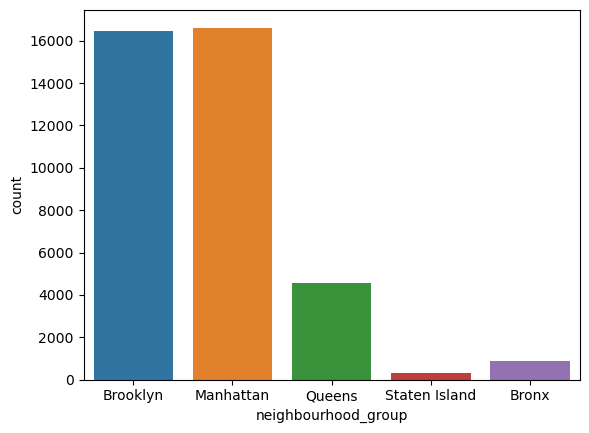

In [25]:
sns.countplot(data = df, x = "neighbourhood_group")

<AxesSubplot:xlabel='room_type', ylabel='count'>

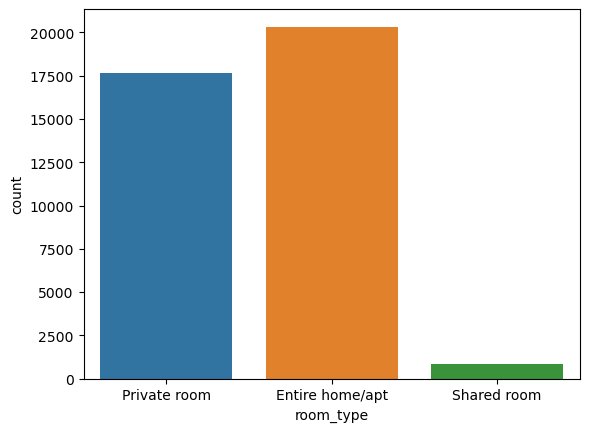

In [26]:
sns.countplot(data = df, x = "room_type")

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

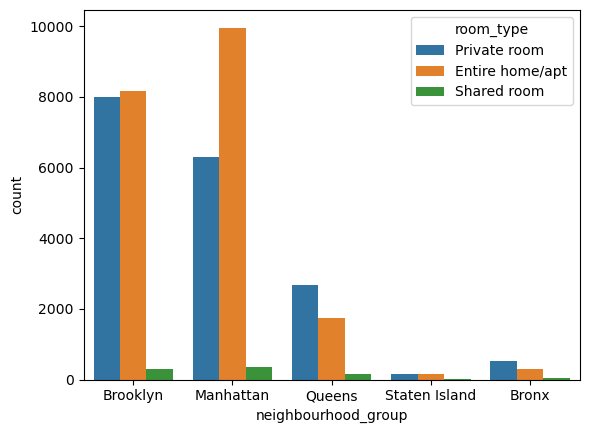

In [27]:
sns.countplot(data = df, x = "neighbourhood_group", hue = "room_type")

<AxesSubplot:ylabel='room_type'>

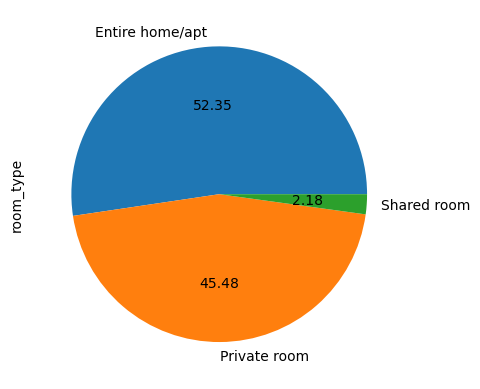

In [28]:
df["room_type"].value_counts().plot(kind = 'pie', autopct = '%.2f')

<AxesSubplot:ylabel='neighbourhood_group'>

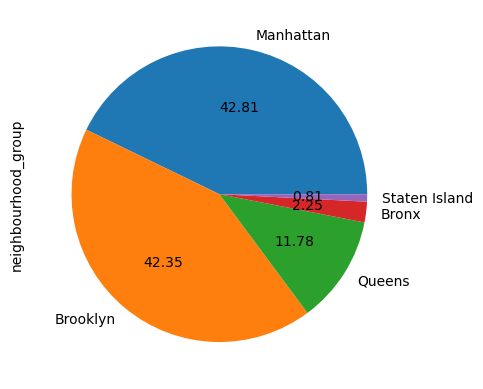

In [29]:
df["neighbourhood_group"].value_counts().plot(kind = 'pie', autopct = '%.2f')

<AxesSubplot:>

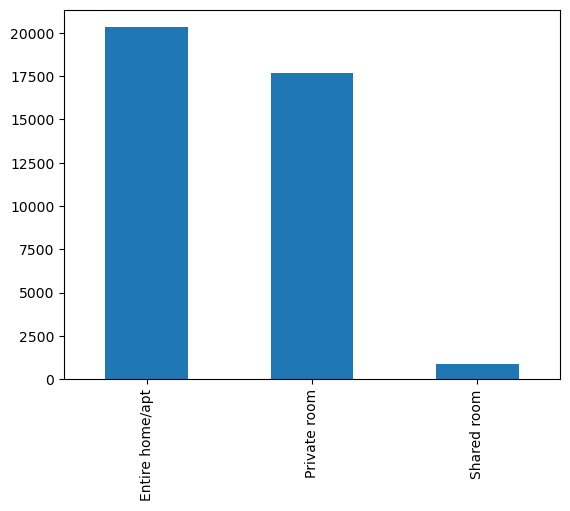

In [32]:
df["room_type"].value_counts().plot(kind = "bar")

In [33]:
df2 = sns.load_dataset("titanic")
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='survived', ylabel='count'>

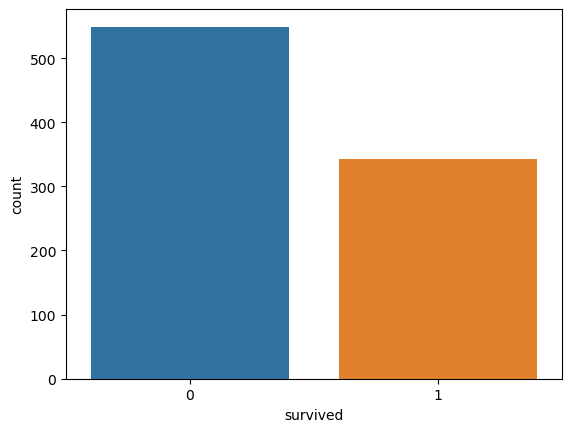

In [34]:
sns.countplot(data = df2, x = "survived")

<AxesSubplot:xlabel='survived', ylabel='count'>

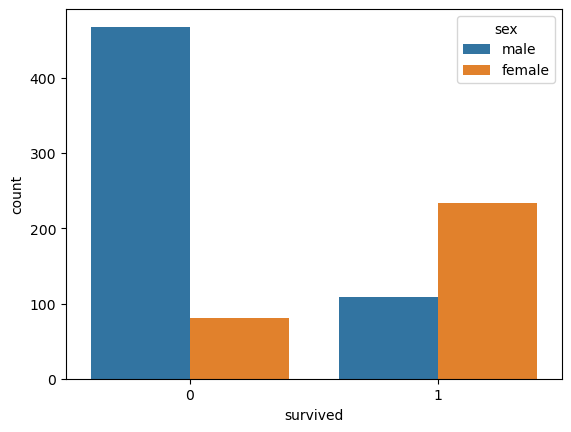

In [35]:
sns.countplot(data = df2, x = "survived", hue = "sex")

<AxesSubplot:xlabel='class', ylabel='count'>

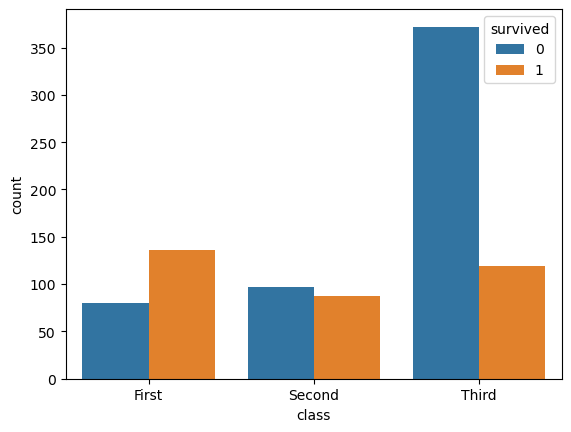

In [36]:
sns.countplot(data = df2, x = "class", hue = "survived")

<AxesSubplot:ylabel='class'>

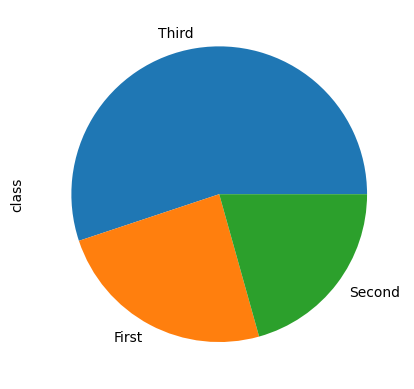

In [37]:
df2["class"].value_counts().plot(kind = "pie")

<AxesSubplot:ylabel='class'>

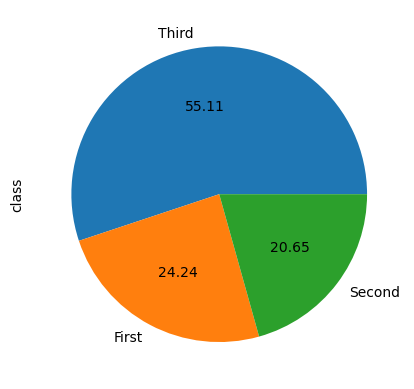

In [38]:
df2["class"].value_counts().plot(kind = "pie", autopct = "%.2f")

## Numerical Data

<AxesSubplot:xlabel='price', ylabel='Count'>

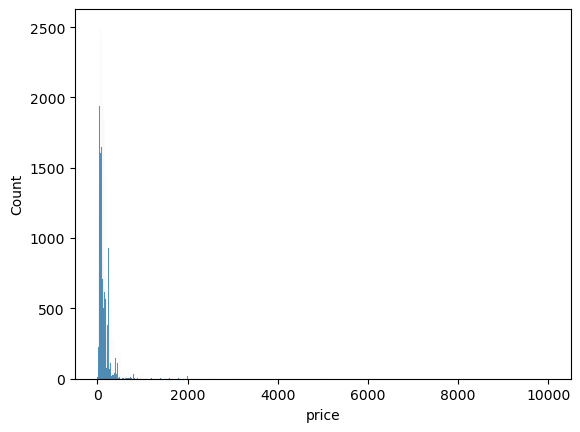

In [39]:
#histogram
sns.histplot(data = df, x = "price")

<AxesSubplot:xlabel='price', ylabel='Count'>

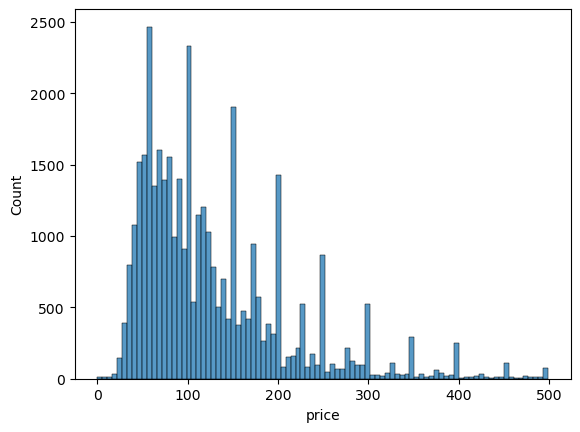

In [41]:
sns.histplot(data = df[df["price"]<500], x = "price")

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

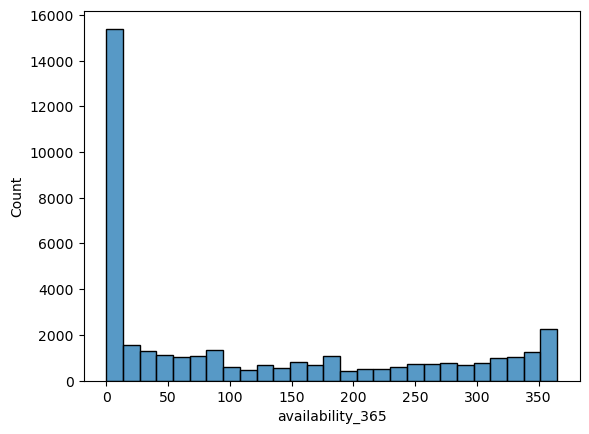

In [42]:
sns.histplot(data = df, x = "availability_365")

<AxesSubplot:xlabel='price', ylabel='Count'>

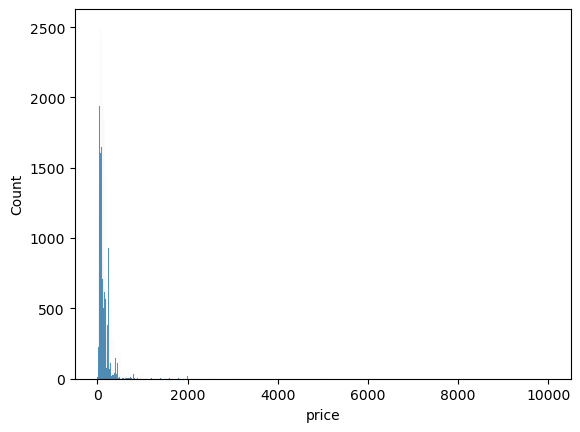

In [45]:
sns.histplot(df["price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

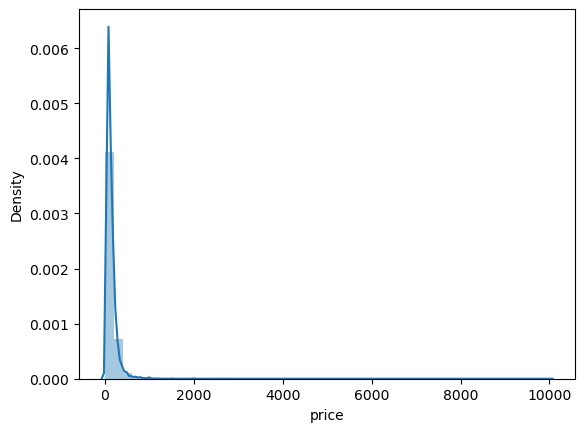

In [46]:
sns.distplot(df["price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

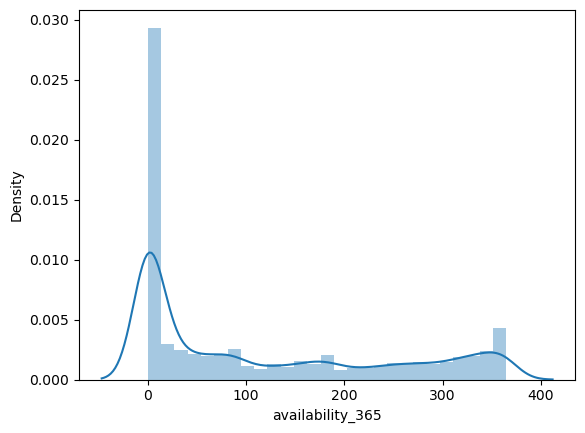

In [47]:
sns.distplot(df["availability_365"])

<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

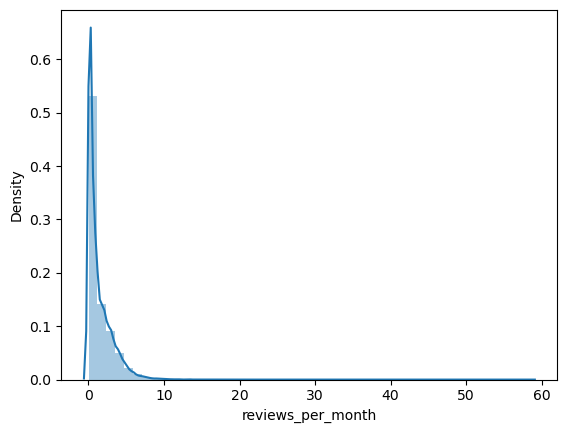

In [53]:
sns.distplot(df["reviews_per_month"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

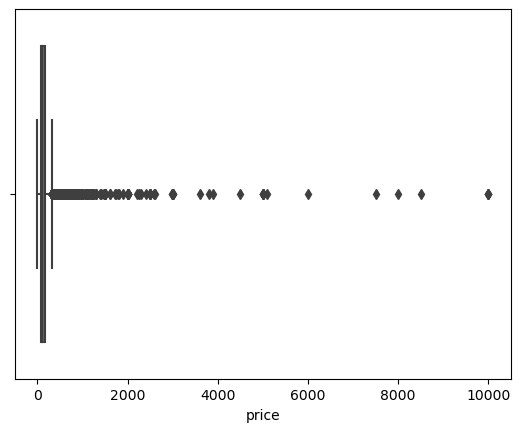

In [54]:
#check how to change labels in this
sns.boxplot(df["price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability_365'>

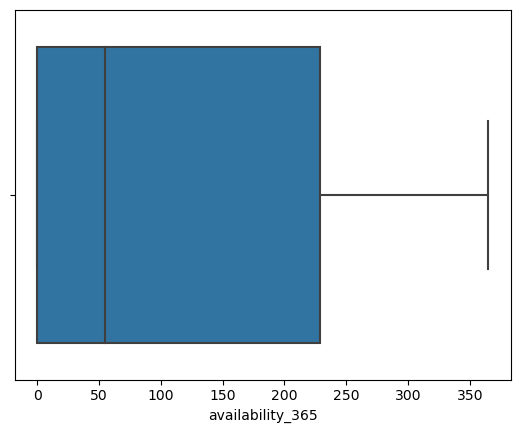

In [55]:
sns.boxplot(df["availability_365"])

<AxesSubplot:xlabel='fare', ylabel='Count'>

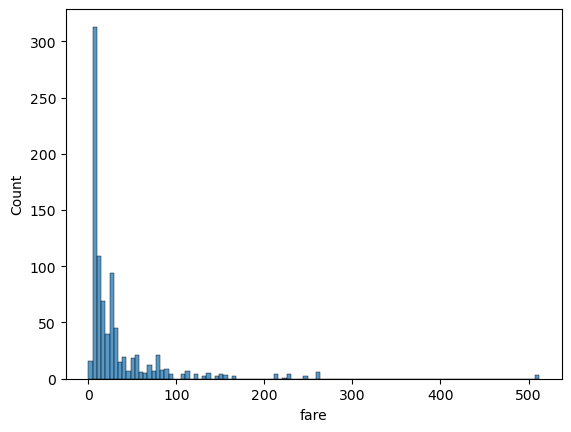

In [56]:
#data from titanic set
sns.histplot(data = df2, x = "fare")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

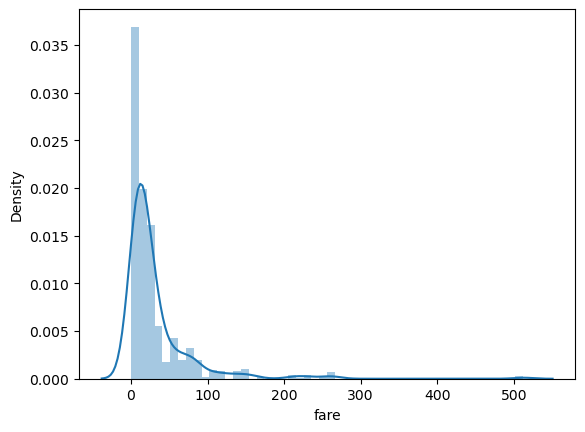

In [58]:
sns.distplot(df2["fare"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

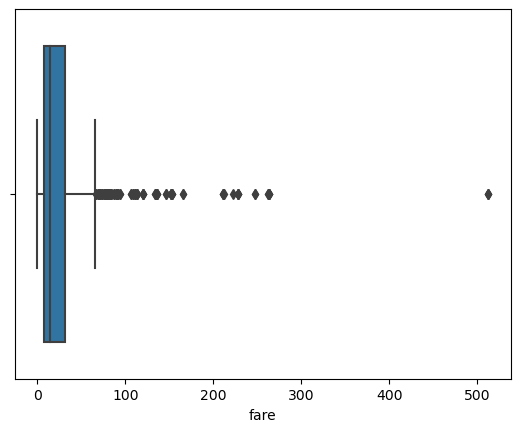

In [59]:
sns.boxplot(df2["fare"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

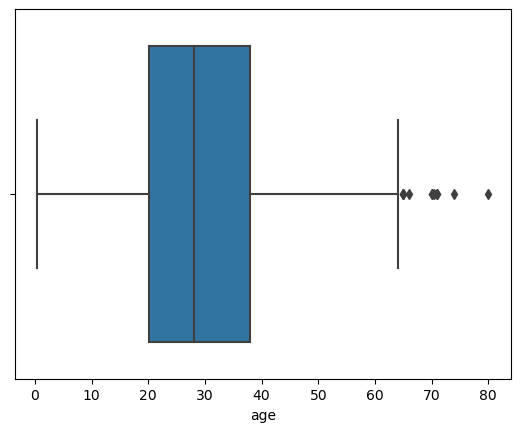

In [60]:
sns.boxplot(df2["age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

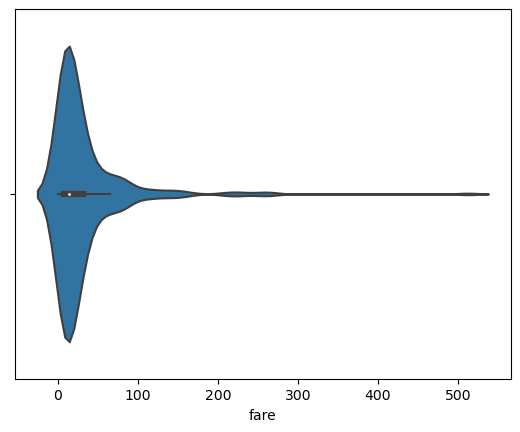

In [61]:
sns.violinplot(df2["fare"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability_365'>

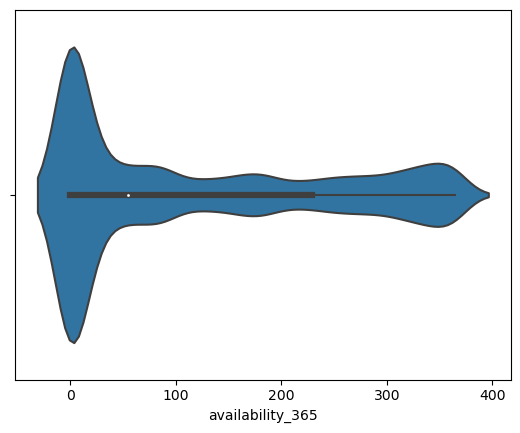

In [66]:
sns.violinplot(df["availability_365"])

## Bivariate

<AxesSubplot:xlabel='class', ylabel='age'>

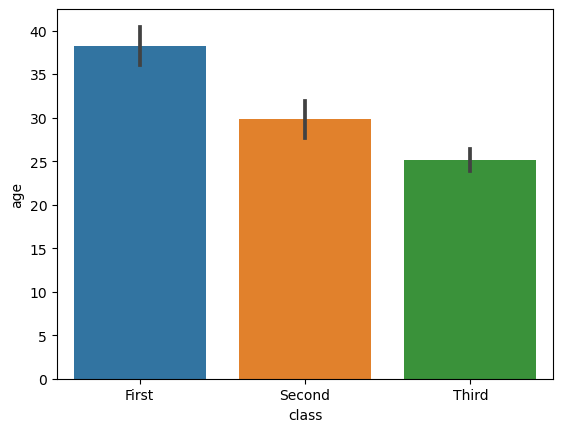

In [75]:
sns.barplot(x = 'class', y = 'age', data = df2)

In [77]:
#check
#sns.barplot(x ="class", y= "age",hue = "sex",estimator="sum", data = df2)

<AxesSubplot:xlabel='sex', ylabel='age'>

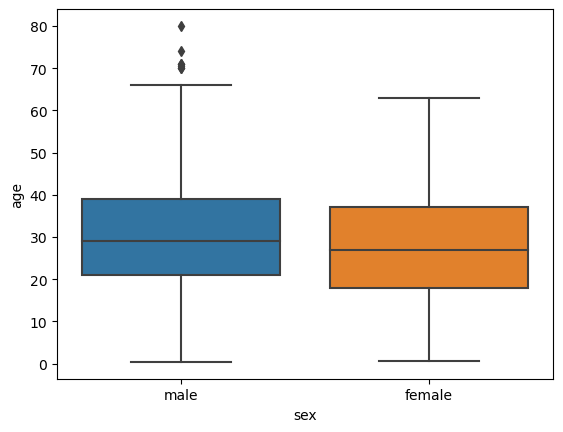

In [78]:
sns.boxplot(x = "sex", y= "age", data = df2)

<AxesSubplot:xlabel='sex', ylabel='age'>

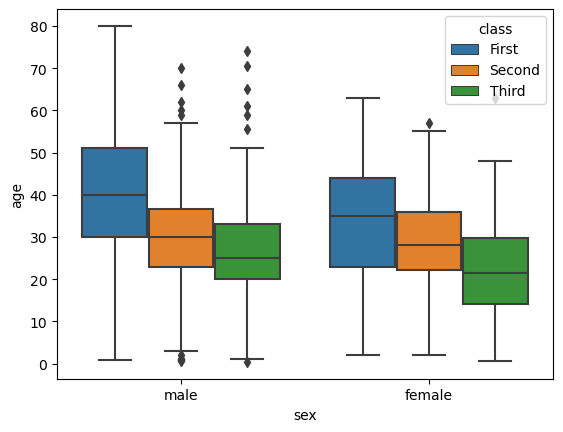

In [79]:
sns.boxplot(x = "sex", y= "age", hue = "class", data = df2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

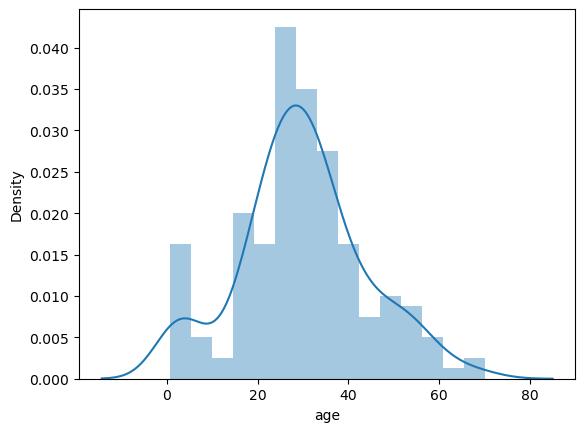

In [84]:
sns.distplot(df2[df2["class"] == "Second"]["age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

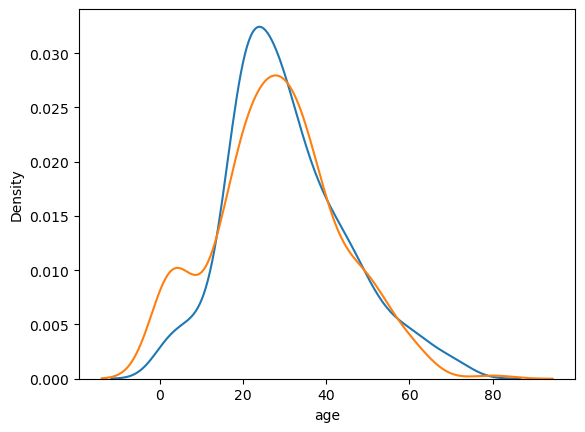

In [81]:
sns.distplot(df2[df2["survived"]==0]["age"], hist = False)
sns.distplot(df2[df2["survived"]==1]["age"], hist = False)

<AxesSubplot:xlabel='sex', ylabel='fare'>

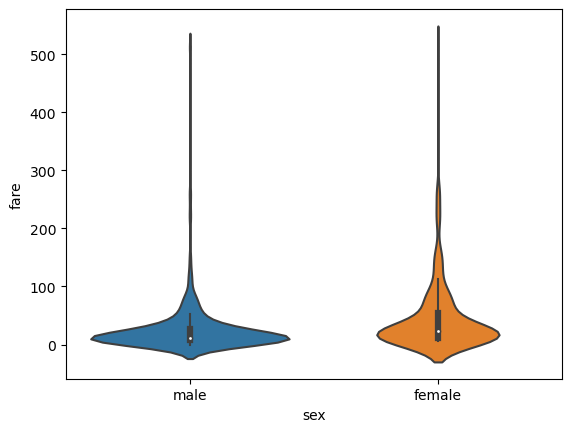

In [82]:
sns.violinplot(x = "sex", y = "fare", data = df2)

## Bivariate 

### categorical

<AxesSubplot:xlabel='survived', ylabel='count'>

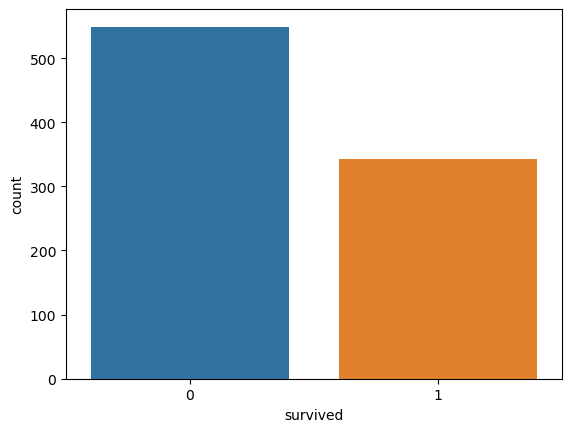

In [85]:
sns.countplot(x = 'survived', data = df2)

<AxesSubplot:xlabel='survived', ylabel='count'>

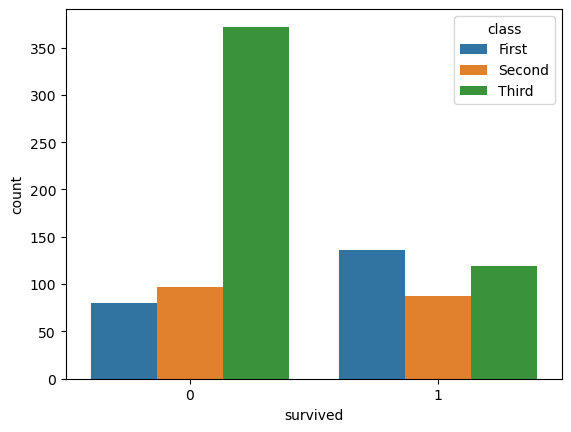

In [86]:
sns.countplot(x = 'survived', hue = "class", data = df2)

In [89]:
x = pd.crosstab(df2["survived"], df2['class'])

In [93]:
x

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='class', ylabel='survived'>

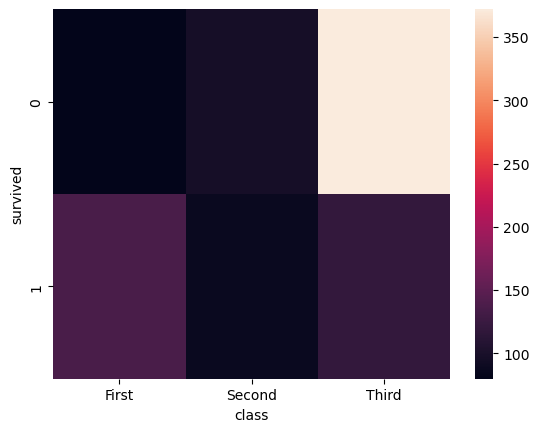

In [95]:
sns.heatmap(x)# dark area tell less survival 

<AxesSubplot:xlabel='class', ylabel='survived'>

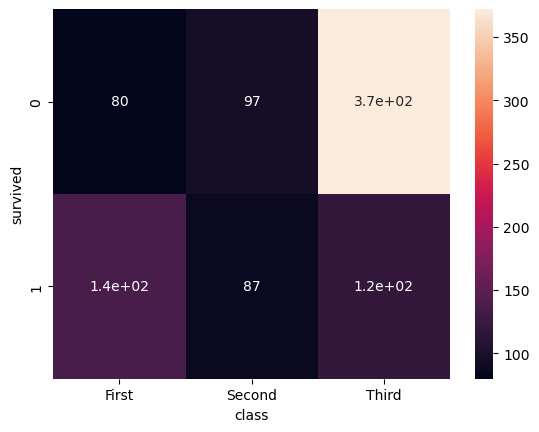

In [96]:
sns.heatmap(x, annot = True)

<AxesSubplot:xlabel='class', ylabel='survived'>

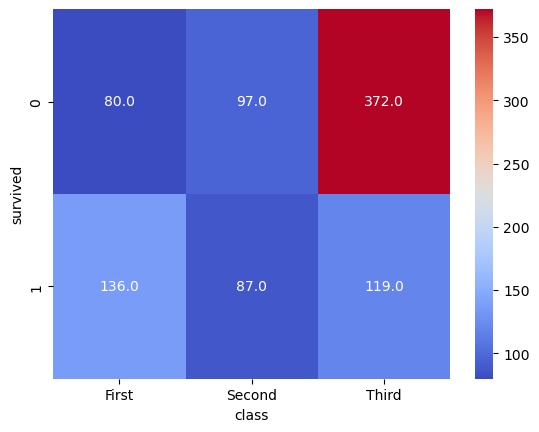

In [99]:
sns.heatmap(x, annot = True, fmt = ".1f", cmap = "coolwarm")

<AxesSubplot:xlabel='class', ylabel='age'>

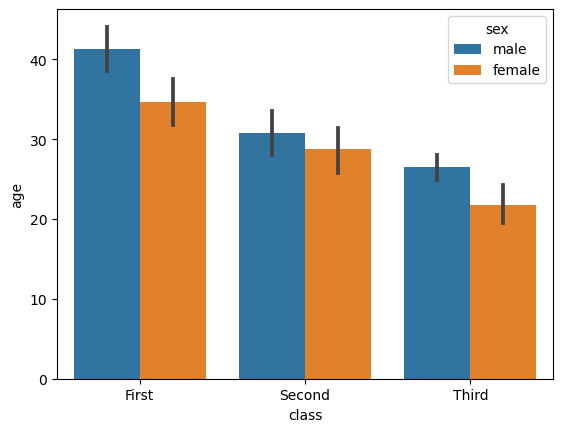

In [100]:
sns.barplot(x = "class", y = "age", hue = "sex", data = df2)

<AxesSubplot:xlabel='class', ylabel='age'>

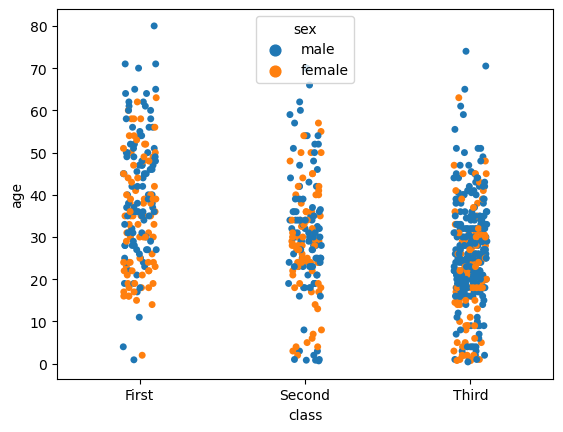

In [101]:
sns.stripplot(x = "class", y = "age", hue = "sex", data = df2)

In [102]:
df3 = sns.load_dataset("iris")
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

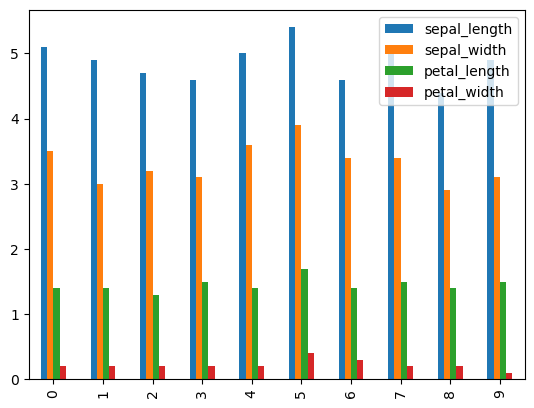

In [103]:
df3.head(10).plot(kind = "bar")

<AxesSubplot:>

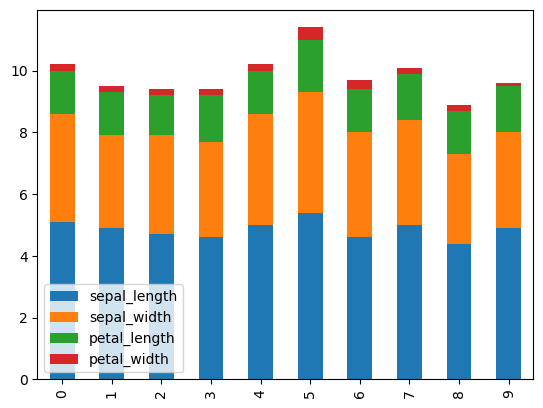

In [104]:
df3.head(10).plot(kind = "bar", stacked = "True")

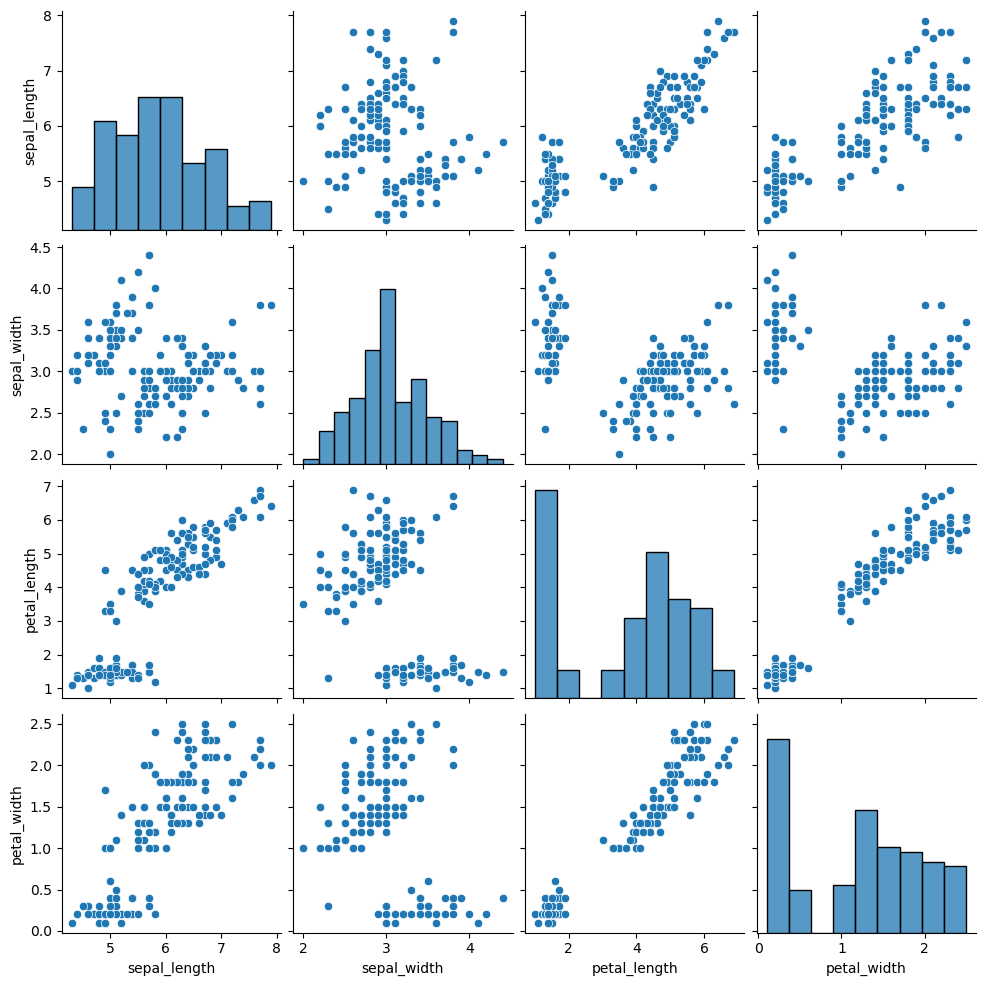

In [105]:
sns.pairplot(df3)

<AxesSubplot:xlabel='age', ylabel='fare'>

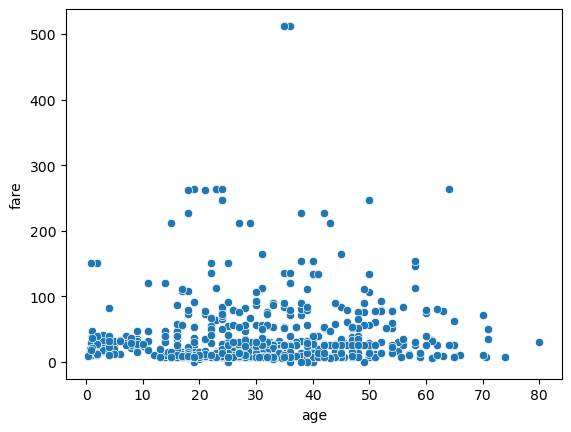

In [106]:
sns.scatterplot(x = "age", y = "fare", data = df2)

<AxesSubplot:xlabel='age', ylabel='fare'>

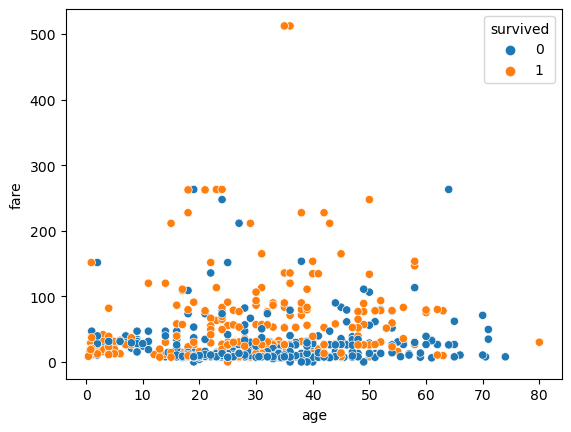

In [107]:
sns.scatterplot(x = "age", y = "fare", hue = "survived", data = df2)

In [108]:
df4 = sns.load_dataset("tips")
df4.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

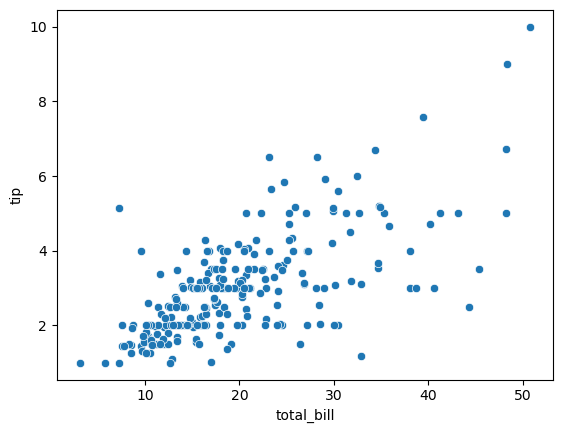

In [109]:
sns.scatterplot(x = "total_bill", y = "tip", data = df4)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

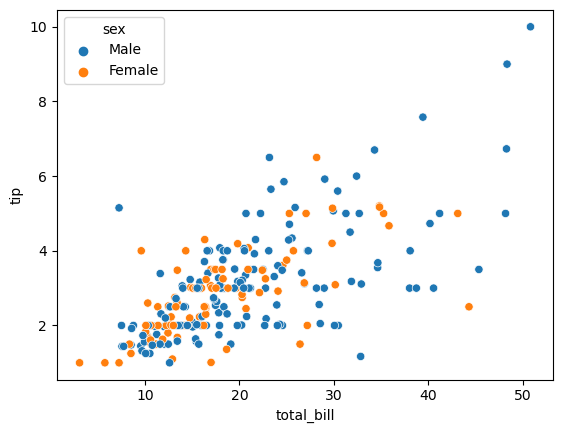

In [110]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "sex", data = df4)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

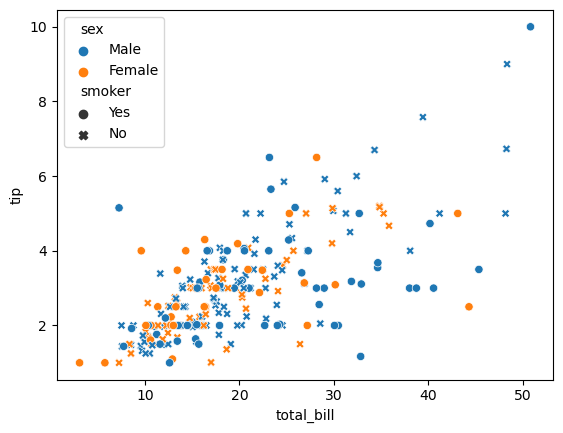

In [111]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "sex", style = "smoker", data = df4)

#### jointplot

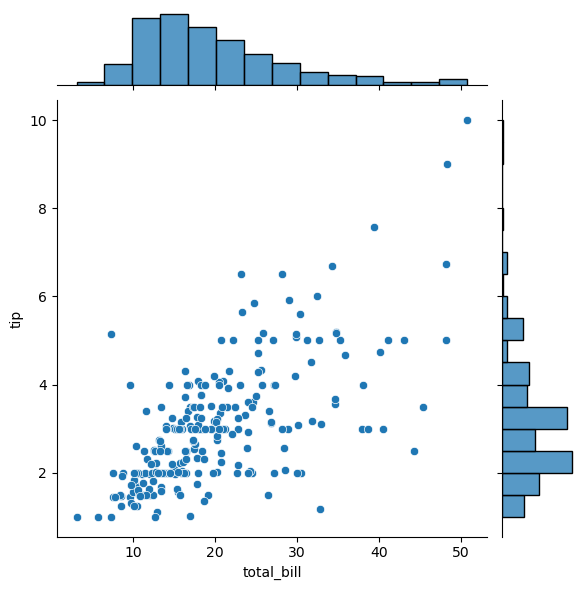

In [112]:
sns.jointplot(x = "total_bill", y = "tip", data = df4)

'get joint probability graph and from this we got knoew that pink defines for female and in this in both\naspect men paid more than women'

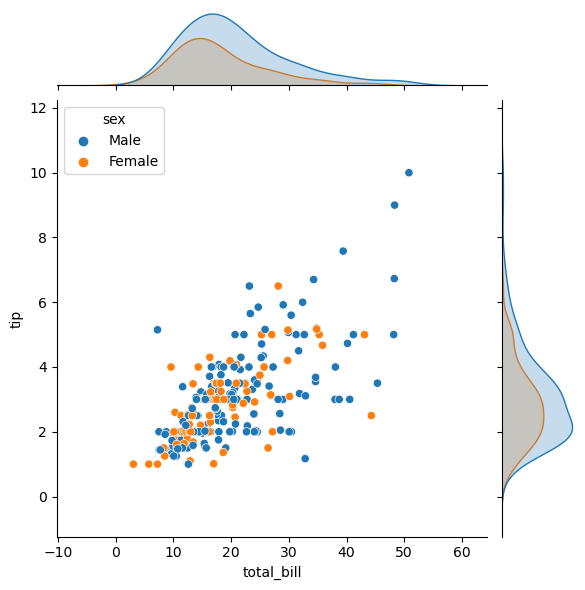

In [114]:
sns.jointplot(x = "total_bill", y = "tip", hue = "sex", data = df4)
'''get joint probability graph and from this we got knoew that pink defines for female and in this in both
aspect men paid more than women'''

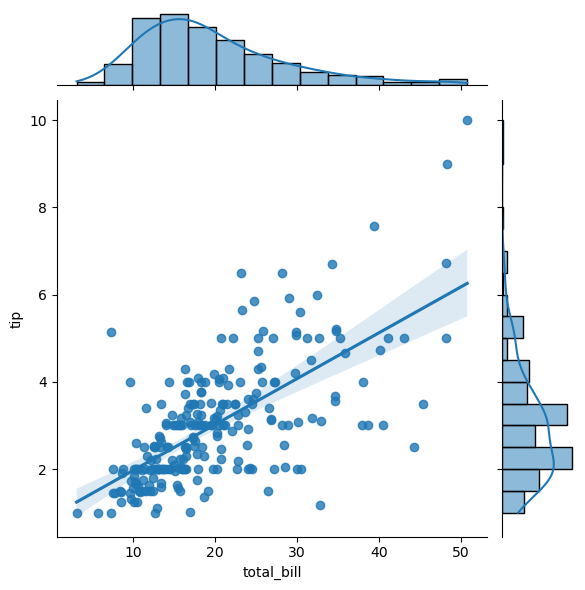

In [115]:
sns.jointplot(x = "total_bill", y = "tip", data = df4, kind = "reg")

In [116]:
df4.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [117]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [130]:
df5 = sns.load_dataset("dowjones")
df5.head() #in this dataset stock price 

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


<AxesSubplot:xlabel='Date', ylabel='Price'>

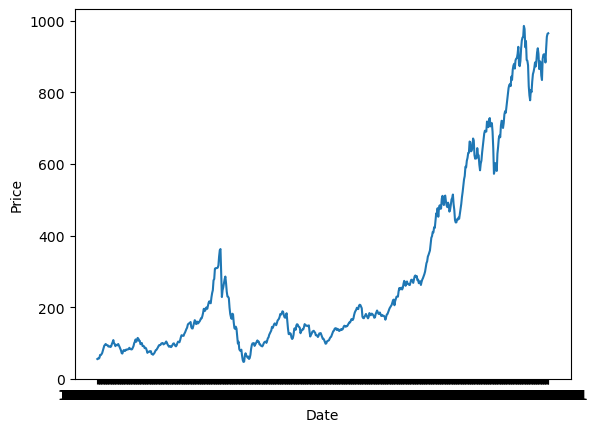

In [131]:
sns.lineplot(x = 'Date', y = 'Price', data = df5)

In [ ]:
#check this data becuase we have get data as month wise 
df5["Month"] = df5["Date"].dt.month
df5["Year"]  = df5["Date"].dt.year

<AxesSubplot:>

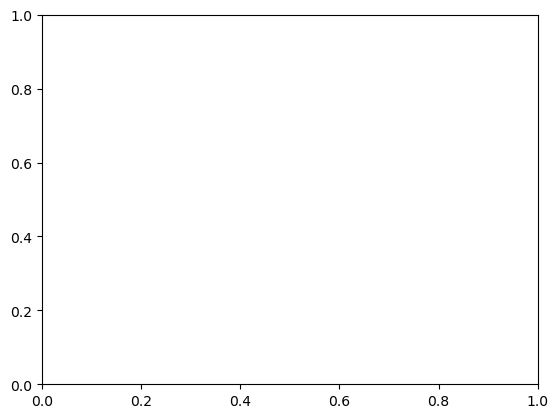

In [126]:
sns.lineplot(x = 'Date', y = 'Price', data = df5[df5["Year"] == 1925])